# Working with Cactus grid functions

In this notebook, we learn how to read data and represent it with the classes in the [grid_data](../grid_data.rst) module. Make sure to see the example on how to work in grid data to better make use of this module ([grid_data](grid_data.ipynb)).

As for all the objects in `kuibit`, the module for reading grid data is also structured hierarchically. 
Each level of this hierarchy focuses on a different subset of all the grid functions. The first level deals with
dimensionality, the second on the available grid functions, and the third will be a specific variable. (Don't worry if this is not clear, if will become clear in a second).

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

%matplotlib inline

The simplest way to access grid functions is from a SimDir with the attributes `gf` or `grid_functions`. You can print the attribute to see all the variables that are available to read.

In [2]:
gf = SimDir("../../tests/grid_functions").gf

print(gf)


Available grid data of dimension 1D (x): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']


Available grid data of dimension 1D (y): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']


Available grid data of dimension 1D (z): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']


Available grid data of dimension 2D (xy): 
['int_em_T_rph', 'int_hydro_T_rph', 'int_surface_density', 'int_torque_dens', 'P', 'rho_b', 'vx', 'vy', 'vz', 'rho', 'rho_star']


Available grid data of dimension 2D (xz): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']


Available grid data of dimension 2D (yz): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']


Available grid data of dimension 3D (xyz): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']



To work with a variable, we first have to select what dimension we are interested in. In this example we will focus on 2D and 3D data. In case you want lower-dimensional cuts from higher-dimensional data (e.g, the plane with z=2 from 3D data), you can ask for 3D data and use the functions in `UniformGridData` to slice the data as you need.

Some of the variables listed here are stored in HDF5 files, other in ASCII files. When you can, always use HDF5 data, as the performances are orders of magnitude better. `kuibit` can handle both, but when HDF5 files are available, those are preferred. 

In [3]:
vars2D = gf.xy  # gf[(0, 1)] would work fine
vars3D = gf.xyz

print(vars3D)


Available grid data of dimension 3D (xyz): 
['P', 'rho_b', 'vx', 'vy', 'vz', 'rho_star']



Now, let's assume that we are interested in working with the density `rho_b`. You can select this variable using the bracket operator or as attribute of the `fields` variable

In [4]:
rho_b = vars2D.fields.rho_b  # vars2D['rho_b'] would be fine

`rho_b` is a rich object. Roughly speaking, it is a dictionary that labels all the iterations in the data. The simplest way to access data is by using the bracket operator, or the `get` methods.

In [5]:
rho0 = rho_b[0]  # this is rho at iteration 0
# rho0 = rho_b.get_iteration(0) is equivalent

# To know what iterations are available:
print(rho_b.iterations)

print("rho0 is a", type(rho0))
print(f"The value of rho0 at the point (1, 2) is {rho0((1, 2))}")

[0, 1, 2]
rho0 is a <class 'kuibit.grid_data.HierarchicalGridData'>
The value of rho0 at the point (1, 2) is 1.29285273509444e-10


As we see `rho0` is a `HierarchicalGridData`. Read documentation about this class to see how to use this object.

You can also use the time instead of the iteration with the `get_time` method:

In [6]:
print(rho_b.available_times)

rho_final = rho_b.get_time(0.5)

[0.0, 0.25, 0.5]


Sometimes we don't need the entire grid, but we want to focus on a small region, and we want to have that sampled with uniform spacing (e.g, for plotting, or because we want to merge the refinement levels). To get a variable on a specified grid, you can use the `read_on_grid` method. At the moment, this method does nothing fancy: it reads the data as `HierarchicalGridData` and interpolates onto the desired grid. 

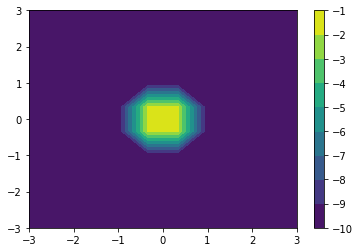

In [7]:
small_grid = UniformGrid([10, 10], x0=[-3, -3], x1=[3,3])

rho0_small = rho_b.read_on_grid(0, small_grid)
# This is equivalent to
# rho0_small = rho_b[0].to_UniformGridData_from_grid(grid)

# In most cases, it is more convenient to read rho_b as 
# HierarchicalGridData and interpolate onto uniform grid
# for plotting

cf = plt.contourf(*rho0_small.coordinates_meshgrid(), np.log10(rho0_small.data_xyz))
plt.colorbar(cf)

The resolution is poor because we are only using 10 points (since this documentation is generated on the fly, so we want to keep the computation cost small). 

Here we are plotting the quantities directly so we can how how to access the data. However, `kuibit` has also a module for plotting, which simplifies most of these operations. For example:

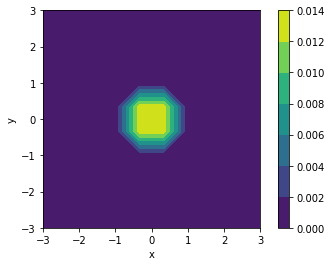

In [8]:
from kuibit import visualize_matplotlib as viz

viz.plot_contourf(rho_b, iteration=2, x0=[-3, -3], x1=[3,3], 
                  shape=[10,10], xlabel="x", ylabel="y",
                  colorbar=True)

We can also make 3D plots. A simple package to made 3D plots is `mayavi`.

Notebook initialized with png backend.



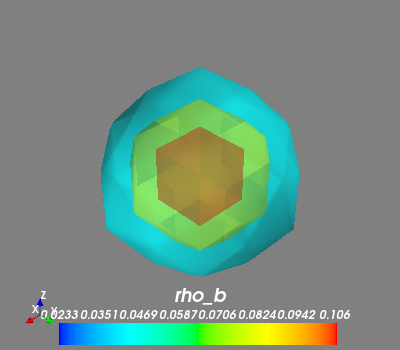

In [9]:
from mayavi import mlab
mlab.init_notebook('png')

# Read 3D data on a small grid
small_3d_grid = UniformGrid([20, 20, 20], x0=[-3, -3, -3], x1=[3,3, 3])
rho3d_small = vars3D['rho_b'].read_on_grid(0, small_3d_grid)
mlab.contour3d(rho3d_small.data, contours=4, transparent=True)
mlab.colorbar(title='rho_b')
mlab.orientation_axes()

If you see a Minecraft Neutron Star, that's perfect! The resolution is very low.

In this notebook we explored the basics of reading simulation data. The next important step for you is to understand how to make use of `HierachicalGridData` and `UniformGridData` (because this what the reader outputs!).